<a href="https://colab.research.google.com/github/dorahs71/ml-course/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cifar10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html


In [1]:
from tensorflow.keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape) # 5000 筆，3 指得是深度，因為這邊用的是 RGB 所以是 3，如果是 CMYK 顏色系統，就是 4
print(y_train.shape) # 5000 筆，但每個照片都只有一個類別
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# 未來有可能一張圖不是只有一個類別，可能出現多個類別，但這邊的資料集比較簡單，所以可以省略 1

y_train = y_train.reshape(50000)
y_test = y_test.reshape(10000)

y_train # 改為 50000 之後，和 (50000,1) 的資料維度就不一樣了，一個是單行 array，一個是二階矩陣

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
    ]

1


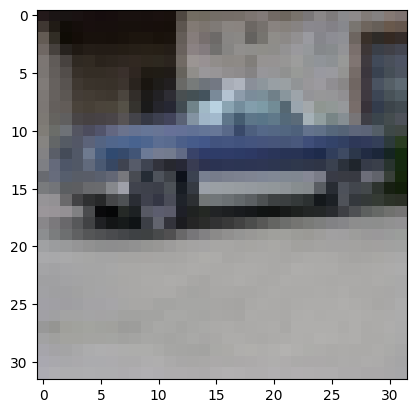

In [7]:
import matplotlib.pyplot as plt
idx = 10000
print(y_train[idx])
plt.imshow(x_train[idx])

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Conv2D : https://keras.io/api/layers/convolution_layers/convolution2d/

layers=[
    Conv2D(64,3,padding="same", activation="relu", input_shape=(32,32,3)),
    MaxPooling2D(),
    Conv2D(128,3,padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256,3,padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512,3,padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="softmax") #放少一點係數在[分類(MLP)]上
]

model = Sequential(layers)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 256)        



## 將 Flatten 層改為 GlobalAveragePooling 層在神經網絡中特別是卷積神經網絡（CNN）中有以下幾個好處：

1. 減少過擬合
GlobalAveragePooling 通過計算每個特徵圖的平均值來壓縮特徵圖，這樣可以減少過擬合的風險，因為它不像 Flatten 那樣保留了每個像素的值，而是進行了降維。

2. 減少參數
GlobalAveragePooling 層不會引入新的參數，因為它只是對每個特徵圖進行全局平均池化，這樣可以使模型更輕量化，減少計算資源的需求。

3. 更強的平移不變性
GlobalAveragePooling 層對輸入圖像的平移具有更強的魯棒性，因為它關注的是整個特徵圖的平均值而不是具體的像素位置。

4. 直接連接分類層
在分類任務中，GlobalAveragePooling 可以直接將特徵圖壓縮成與類別數目相同的節點數，這樣可以直接連接到 softmax 層，簡化了網絡結構。

5. 減少維度災難
當使用 Flatten 層時，特徵圖的每個像素都會展平為一個長向量，這樣可能會導致高維數據，從而引起維度災難。GlobalAveragePooling 通過壓縮特徵圖來避免這個問題。

In [10]:
# 改良版-剔除掉位置資訊
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D

# Conv2D : https://keras.io/api/layers/convolution_layers/convolution2d/

layers=[
    Conv2D(64,3,padding="same", activation="relu", input_shape=(32,32,3)),
    MaxPooling2D(),
    Conv2D(128,3,padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256,3,padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512,3,padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(), # 將原本 Flatten 改為 GlobalAveragingPooling
    Dense(10, activation="softmax") #放少一點係數在[分類(MLP)]上
]

model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 4, 4, 256)        